In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.utils import np_utils





ImportError: cannot import name 'np_utils' from 'keras.utils' (C:\Users\jyoth\anaconda3\Lib\site-packages\keras\api\utils\__init__.py)

In [10]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3051s 18us/step


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


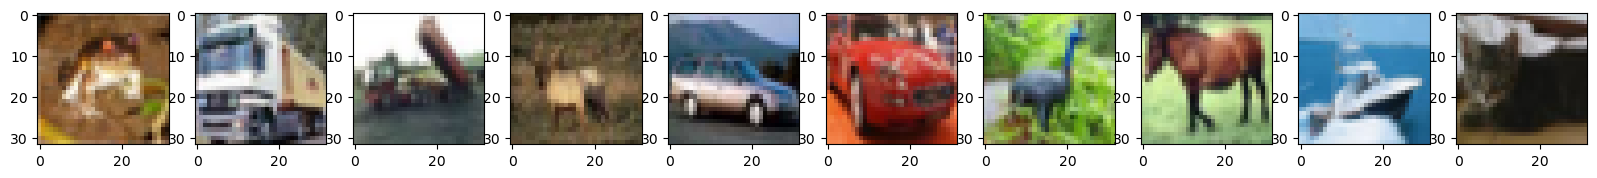

In [16]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [20]:
X_train = x_train / 255
X_test = x_test / 255

In [26]:
num_classes = 10
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10) 

In [28]:
print("Train data shapes")
print(X_train.shape)
print(Y_train.shape)
print("Test data shapes")
print(X_test.shape)
print(Y_test.shape)

Train data shapes
(50000, 32, 32, 3)
(50000, 10)
Test data shapes
(10000, 32, 32, 3)
(10000, 10)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

# Add 2 convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

# Add maxpool layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Add flatten layer
model.add(Flatten())

# Add Dense layers for hidden and output
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Print model summary to verify
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,110,122 (8.05 MB)

 Trainable params: 2,110,122 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')
     

In [40]:
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)

Epoch 1/10
313/313 - 28s - 91ms/step - accuracy: 0.4315 - loss: 1.5939 - val_accuracy: 0.5580 - val_loss: 1.2755
Epoch 2/10
313/313 - 24s - 77ms/step - accuracy: 0.5995 - loss: 1.1500 - val_accuracy: 0.5981 - val_loss: 1.1464
Epoch 3/10
313/313 - 29s - 92ms/step - accuracy: 0.6625 - loss: 0.9650 - val_accuracy: 0.6558 - val_loss: 0.9964
Epoch 4/10
313/313 - 34s - 108ms/step - accuracy: 0.7092 - loss: 0.8314 - val_accuracy: 0.6735 - val_loss: 0.9544
Epoch 5/10
313/313 - 46s - 148ms/step - accuracy: 0.7527 - loss: 0.7138 - val_accuracy: 0.6759 - val_loss: 0.9566
Epoch 6/10
313/313 - 34s - 109ms/step - accuracy: 0.7948 - loss: 0.5942 - val_accuracy: 0.6818 - val_loss: 0.9565
Epoch 7/10
313/313 - 32s - 102ms/step - accuracy: 0.8354 - loss: 0.4854 - val_accuracy: 0.6807 - val_loss: 0.9878
Epoch 8/10
313/313 - 38s - 122ms/step - accuracy: 0.8742 - loss: 0.3763 - val_accuracy: 0.6779 - val_loss: 1.0983
Epoch 9/10
313/313 - 52s - 165ms/step - accuracy: 0.9062 - loss: 0.2857 - val_accuracy: 0.6

In [42]:
def plotLosses(Info):  
    plt.plot(Info.history['loss'])
    plt.plot(Info.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

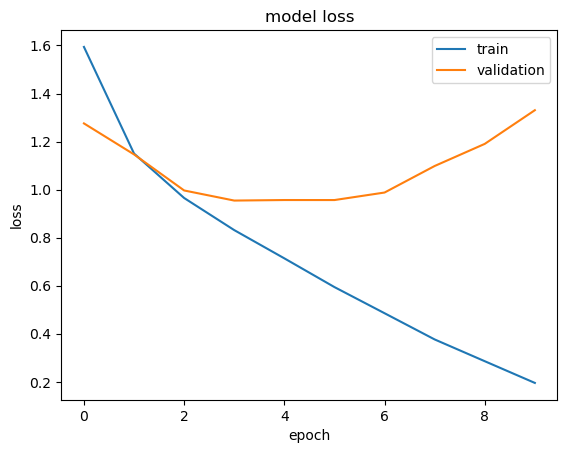

In [44]:
plotLosses(Info)

In [46]:
model= Sequential()
# Add 2 convolution layers
model.add(Conv2D(32,kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# Add Dropaut Layer
model.add(Dropout(0.25))

# Add flatten layer
model.add(Flatten())
# Add Dense layers for hidden and output

model.add(Dense(256, activation= 'relu'))
model.add(Dense(num_classes,activation= 'softmax'))

In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,110,122 (8.05 MB)

 Trainable params: 2,110,122 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(loss='categorical_crossentropy', metrics= ['accuracy'], optimizer= 'adam')

In [52]:
Info = model.fit(X_train, Y_train, batch_size= 128, epochs= 10, verbose=2, validation_split= 0.2)

Epoch 1/10
313/313 - 34s - 110ms/step - accuracy: 0.4694 - loss: 1.4832 - val_accuracy: 0.5742 - val_loss: 1.2242
Epoch 2/10
313/313 - 45s - 144ms/step - accuracy: 0.6178 - loss: 1.0946 - val_accuracy: 0.6190 - val_loss: 1.1063
Epoch 3/10
313/313 - 37s - 118ms/step - accuracy: 0.6689 - loss: 0.9484 - val_accuracy: 0.6615 - val_loss: 0.9825
Epoch 4/10
313/313 - 33s - 106ms/step - accuracy: 0.7020 - loss: 0.8533 - val_accuracy: 0.6792 - val_loss: 0.9290
Epoch 5/10
313/313 - 34s - 108ms/step - accuracy: 0.7318 - loss: 0.7680 - val_accuracy: 0.6792 - val_loss: 0.9363
Epoch 6/10
313/313 - 38s - 120ms/step - accuracy: 0.7592 - loss: 0.6879 - val_accuracy: 0.6925 - val_loss: 0.9017
Epoch 7/10
313/313 - 36s - 115ms/step - accuracy: 0.7869 - loss: 0.6053 - val_accuracy: 0.6952 - val_loss: 0.9192
Epoch 8/10
313/313 - 46s - 145ms/step - accuracy: 0.8187 - loss: 0.5140 - val_accuracy: 0.7058 - val_loss: 0.9076
Epoch 9/10
313/313 - 44s - 141ms/step - accuracy: 0.8479 - loss: 0.4377 - val_accuracy: 

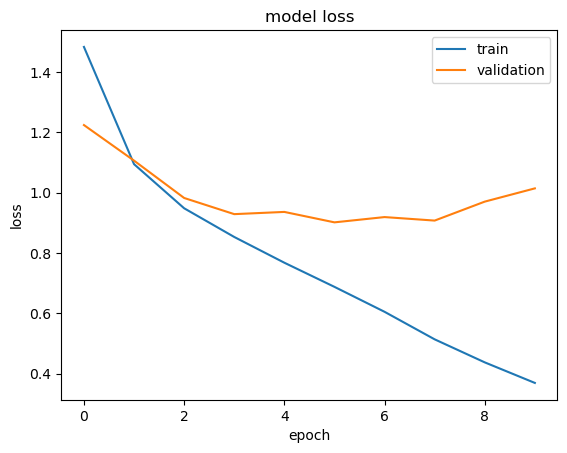

In [54]:
plotLosses(Info)

In [56]:
score = model.evaluate(X_test, Y_test, batch_size=128, verbose=0)

In [58]:
print(model.metrics_names)
print(score)


['loss', 'compile_metrics']
[1.0288126468658447, 0.6898000240325928]
